In [ ]:
#Is this code efficient? No. 
#Should you run this on a computer with less than 16GB of RAM? No.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import geopandas

In [3]:
#Using Citi Bike data from 2019 (pre-covid)
#These files are gigantic

jan = pd.read_csv("./citibikedata/201901-citibike-tripdata.csv")
feb = pd.read_csv("./citibikedata/201902-citibike-tripdata.csv")
mar = pd.read_csv("./citibikedata/201903-citibike-tripdata.csv")
apr = pd.read_csv("./citibikedata/201904-citibike-tripdata.csv")
may = pd.read_csv("./citibikedata/201905-citibike-tripdata.csv")
jun = pd.read_csv("./citibikedata/201906-citibike-tripdata.csv")
jul = pd.read_csv("./citibikedata/201907-citibike-tripdata.csv")
aug = pd.read_csv("./citibikedata/201908-citibike-tripdata.csv")
sep = pd.read_csv("./citibikedata/201909-citibike-tripdata.csv")
octb = pd.read_csv("./citibikedata/201910-citibike-tripdata.csv")
nov = pd.read_csv("./citibikedata/201911-citibike-tripdata.csv")
dec = pd.read_csv("./citibikedata/201912-citibike-tripdata.csv")


In [4]:
#Process data from 2018 too while we're at it
#These files are gigantic

jan18 = pd.read_csv("./citibikedata/201801-citibike-tripdata.csv")
feb18 = pd.read_csv("./citibikedata/201802-citibike-tripdata.csv")
mar18 = pd.read_csv("./citibikedata/201803-citibike-tripdata.csv")
apr18 = pd.read_csv("./citibikedata/201804-citibike-tripdata.csv")
may18 = pd.read_csv("./citibikedata/201805-citibike-tripdata.csv")
jun18 = pd.read_csv("./citibikedata/201806-citibike-tripdata.csv")
jul18 = pd.read_csv("./citibikedata/201807-citibike-tripdata.csv")
aug18 = pd.read_csv("./citibikedata/201808-citibike-tripdata.csv")
sep18 = pd.read_csv("./citibikedata/201809-citibike-tripdata.csv")
octb18 = pd.read_csv("./citibikedata/201810-citibike-tripdata.csv")
nov18 = pd.read_csv("./citibikedata/201811-citibike-tripdata.csv")
dec18 = pd.read_csv("./citibikedata/201812-citibike-tripdata.csv")


In [5]:
#Combining 12 months of data into one dataframe
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octb, nov, dec]
months18 = [jan18, feb18, mar18, apr18, may18, jun18, jul18, aug18, sep18, octb18, nov18, dec18]

cb = pd.concat(months)
cb18 = pd.concat(months18)
cb.reset_index(inplace=True, drop=True)
cb18.reset_index(inplace=True, drop=True)
cb.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [6]:
#Getting pandas to parse the start and endtimes into something it can read
cb["starttime"] = pd.to_datetime(cb["starttime"])
cb["stoptime"] = pd.to_datetime(cb["stoptime"])
cb18["starttime"] = pd.to_datetime(cb18["starttime"])
cb18["stoptime"] = pd.to_datetime(cb18["stoptime"])
cb18.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
#Since we have so many rows, we drop any rows that are missing any data
cb = cb.dropna()
cb18 = cb18.dropna()

In [8]:
#Using geopandas to convert all start stations to points, adds a "geometry" column to the end of the dataframe
gdf = geopandas.GeoDataFrame(cb, geometry = geopandas.points_from_xy(cb["start station longitude"], cb["start station latitude"]))
gdf18 = geopandas.GeoDataFrame(cb18, geometry = geopandas.points_from_xy(cb18["start station longitude"], cb18["start station latitude"]))

In [9]:
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:4326")
gdf18 = gdf18.set_crs("EPSG:4326")
gdf18 = gdf18.to_crs("EPSG:4326")
gdf


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97375 40.77897)
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97771 40.75187)
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.97667 40.78525)
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.98166 40.73222)
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.99379 40.72743)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20551692,93,2019-12-31 23:58:18.016,2019-12-31 23:59:51.636,3141.0,1 Ave & E 68 St,40.765005,-73.958185,3142.0,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2,POINT (-73.95818 40.76501)
20551693,786,2019-12-31 23:58:59.896,2020-01-01 00:12:06.346,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1,POINT (-73.99393 40.75155)
20551694,351,2019-12-31 23:59:03.695,2020-01-01 00:04:54.873,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368.0,5 Ave & 3 St,40.672815,-73.983524,27746,Subscriber,1935,2,POINT (-73.97088 40.67297)
20551695,1571,2019-12-31 23:59:21.361,2020-01-01 00:25:32.942,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1,POINT (-73.99852 40.73226)


<AxesSubplot:>

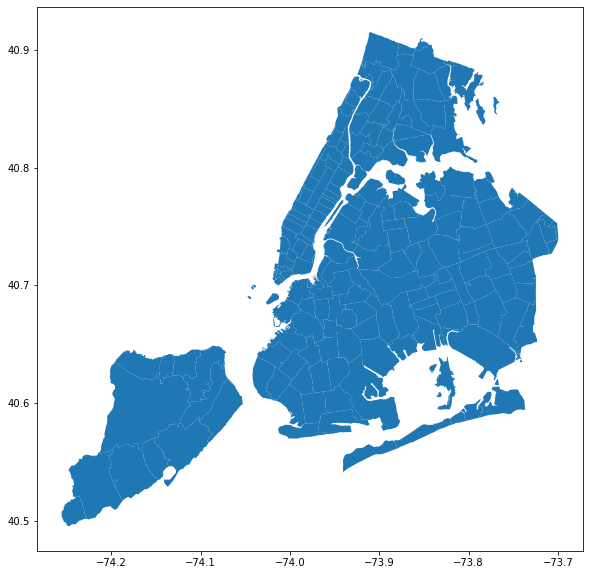

In [10]:
#Loads in a zipcode map from NYC open data, and converts from Mercator to Long/Lat (to match the Citi Bike data)
#We could have also converted all Citi Bike data into Mercator, but it has 7 million rows
zipcodes = geopandas.GeoDataFrame.from_file("./zipcodes")
zipcodes = zipcodes.to_crs("EPSG:4326")

#Plots map (it's pretty!)
zipcodes.plot(figsize = (20,10))


In [35]:
#Creates a dataframe of each individual station and its coordinates in lon/lat
stationsList = gdf.drop_duplicates("start station id")
stationsList18 = gdf18.drop_duplicates("start station id")
stationsList = stationsList[["start station id", "start station latitude", "start station longitude", "start station name", "geometry"]]
stationsList18 = stationsList18[["start station id", "start station latitude", "start station longitude", "start station name", "geometry"]]
stationsList.reset_index(inplace = True, drop = True)
stationsList18.reset_index(inplace=True, drop=True)
stationsList


,start station id,start station latitude,start station longitude,start station name,geometry
0,3160.0,40.778968,-73.973747,Central Park West & W 76 St,POINT (-73.97375 40.77897)
1,519.0,40.751873,-73.977706,Pershing Square North,POINT (-73.97771 40.75187)
2,3171.0,40.785247,-73.976673,Amsterdam Ave & W 82 St,POINT (-73.97667 40.78525)
3,504.0,40.732219,-73.981656,1 Ave & E 16 St,POINT (-73.98166 40.73222)
4,229.0,40.727434,-73.993790,Great Jones St,POINT (-73.99379 40.72743)
...,...,...,...,...,...
931,3740.0,40.726378,-74.000472,W Broadway & W Houston St,POINT (-74.00047 40.72638)
932,3884.0,40.699690,-73.902200,Centre St & Seneca Ave,POINT (-73.90220 40.69969)
933,3910.0,40.709697,-73.907856,Greene Ave & Grandview Ave,POINT (-73.90786 40.70970)
934,3909.0,40.704080,-73.904080,Madison St & Woodward Ave,POINT (-73.90408 40.70408)


In [43]:
stationsList18.loc[752]


start station id                                                 3650.0
start station latitude                                        45.506264
start station longitude                                      -73.568906
start station name                                         8D Mobile 01
geometry                   POINT (-73.56890559196472 45.50626419100119)
Name: 752, dtype: object

<AxesSubplot:>

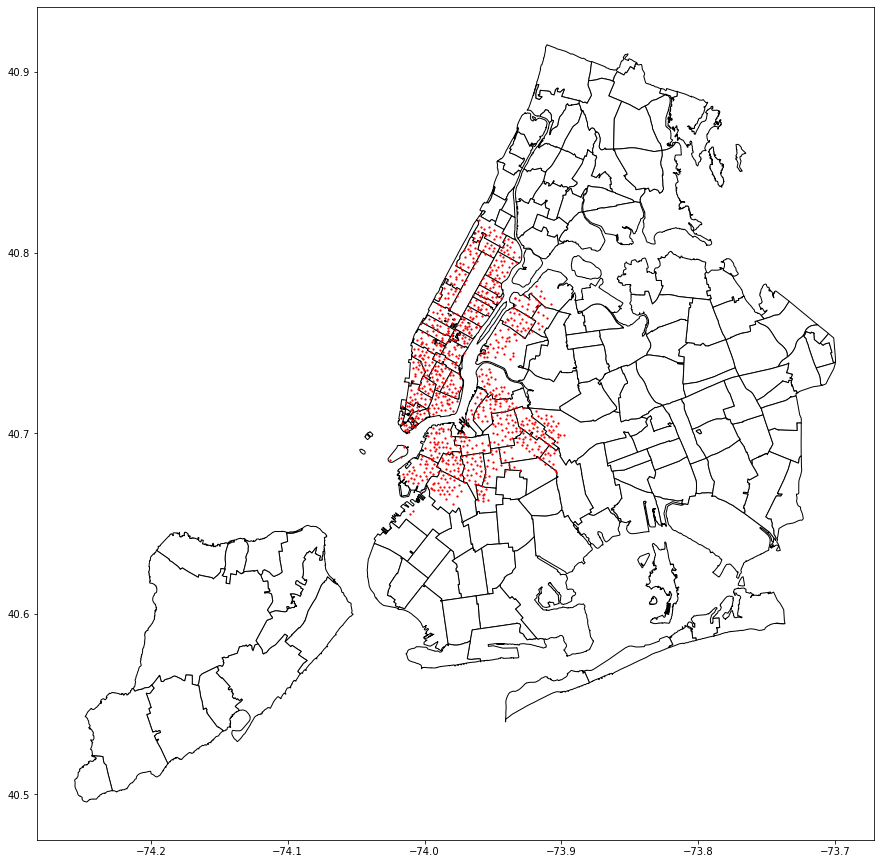

In [13]:
#Plots all of our stations onto a map of NYC
ax = zipcodes.plot(color = 'white', edgecolor = 'black', figsize = (15, 30))
stationsList.plot(ax = ax, color = 'red', markersize = 1.5)


In [41]:
#Now we determine the zip code of each station (this is computationally quite intensive)
stationZip = [0] * len(stationsList)
for i in range(len(stationsList)):
    foundZip = False
    while foundZip == False:
        #491 is giving issues for some reason, for the sake of time we will just hardcode it
        if(i == 491):
            stationZip[491] = 10043
            foundZip = True
        for j in range(len(zipcodes)):
            if (stationsList.loc[i]['geometry'].within(zipcodes.loc[j]['geometry'])):
                #print("We are on Station", i, "Station ID", stationsList.loc[i]['start station id'], "is in", zipcodes.loc[j]['ZIPCODE'])
                stationZip[i] = zipcodes.loc[j]['ZIPCODE']
                foundZip = True


Exception ignored in: <function BaseGeometry.__del__ at 0x000002B79E4F29D0>
Traceback (most recent call last):
  File "C:\Users\brian\anaconda3\envs\498A\lib\site-packages\shapely\geometry\base.py", line 242, in __del__
    self.empty(val=None)
  File "C:\Users\brian\anaconda3\envs\498A\lib\site-packages\shapely\geometry\base.py", line 227, in empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


In [44]:
#Same thing for 2018
stationZip18 = [0] * len(stationsList18)
for i in range(len(stationsList18)):
    foundZip = False
    while foundZip == False:
        for j in range(len(zipcodes)):
            #87 is giving issues for some reason, for the sake of time we will just hardcode it
            if(i == 87):
                stationZip[87] = 10043
                foundZip = True
            if(i == 607):
                stationZip[607] = 0
                foundZip = True
            if(i == 752):
                stationZip[752] = 0
                foundZip = True
            if (stationsList18.loc[i]['geometry'].within(zipcodes.loc[j]['geometry'])):
                print("We are on Station", i, "Station ID", stationsList18.loc[i]['start station id'], "is in", zipcodes.loc[j]['ZIPCODE'])
                stationZip18[i] = zipcodes.loc[j]['ZIPCODE']
                foundZip = True


We are on Station 0 Station ID 72.0 is in 10019
We are on Station 1 Station ID 79.0 is in 10013
We are on Station 2 Station ID 82.0 is in 10038
We are on Station 3 Station ID 83.0 is in 11217
We are on Station 4 Station ID 119.0 is in 11205
We are on Station 5 Station ID 120.0 is in 11238
We are on Station 6 Station ID 127.0 is in 10014
We are on Station 7 Station ID 128.0 is in 10014
We are on Station 8 Station ID 143.0 is in 11201
We are on Station 9 Station ID 144.0 is in 11201
We are on Station 10 Station ID 146.0 is in 10013
We are on Station 11 Station ID 150.0 is in 10009
We are on Station 12 Station ID 151.0 is in 10012
We are on Station 13 Station ID 152.0 is in 10007
We are on Station 14 Station ID 157.0 is in 11201
We are on Station 15 Station ID 161.0 is in 10012
We are on Station 16 Station ID 164.0 is in 10017
We are on Station 17 Station ID 167.0 is in 10016
We are on Station 18 Station ID 168.0 is in 10011
We are on Station 19 Station ID 173.0 is in 10019
We are on Stat

In [46]:
#Now we add those zips to our dataframe
stationsList['zipcode'] = stationZip
stationsList = stationsList.rename(columns={'start station id': 'station id', 'start station latitude': 'station latitude', 'start station longitude': 'station longitude', 'start station name': 'station name'})

stationsList18['zipcode'] = stationZip18
stationsList18 = stationsList18.rename(columns={'start station id': 'station id', 'start station latitude': 'station latitude', 'start station longitude': 'station longitude', 'start station name': 'station name'})

#Creates a two dfs of just stations numbers and their associated zip codes
startStationZips = stationsList.drop(columns = ['station latitude', 'station longitude', 'station name', 'geometry'])
startStationZips = startStationZips.rename(columns={'station id': 'start station id', 'zipcode': 'startzipcode'})
startStationZips18 = stationsList18.drop(columns = ['station latitude', 'station longitude', 'station name', 'geometry'])
startStationZips18 = startStationZips18.rename(columns={'station id': 'start station id', 'zipcode': 'startzipcode'})

endStationZips = stationsList.drop(columns = ['station latitude', 'station longitude', 'station name', 'geometry'])
endStationZips = endStationZips.rename(columns={'station id': 'end station id', 'zipcode': 'endzipcode'})
endStationZips18 = stationsList18.drop(columns = ['station latitude', 'station longitude', 'station name', 'geometry'])
endStationZips18 = endStationZips18.rename(columns={'station id': 'end station id', 'zipcode': 'endzipcode'})



In [49]:
startStationZips18.head(10)

,start station id,startzipcode
0,72.0,10019
1,79.0,10013
2,82.0,10038
3,83.0,11217
4,119.0,11205
5,120.0,11238
6,127.0,10014
7,128.0,10014
8,143.0,11201
9,144.0,11201


In [52]:
#How many zip codes have stations?
numZips = len(stationsList.zipcode.unique())
print("There are", numZips, "unique zip codes that contain at least one Citi Bike station in 2019")

numZips18 = len(stationsList18.zipcode.unique())
print("There are", numZips18, "unique zip codes that contain at least one Citi Bike station in 2018")

#This is a pretty good number, granular enough to draw conclusions about demand while not being overwhelmingly large
#Looks like they started serving 3 new zip codes in 2019

There are 64 unique zip codes that contain at least one Citi Bike station in 2019
There are 61 unique zip codes that contain at least one Citi Bike station in 2018


In [54]:
#Now we tack on zip codes to each indidual trip taken in the entire dataset

mergedGDF = pd.merge(gdf, startStationZips, how = 'left')
mergedGDF = pd.merge(mergedGDF, endStationZips, how = 'left')

mergedGDF18 = pd.merge(gdf18, startStationZips18, how='left')
mergedGDF18 = pd.merge(mergedGDF18, endStationZips18, how='left')


In [19]:
mergedGDF.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,startzipcode,endzipcode
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97375 40.77897),00083,10024
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97771 40.75187),10017,10016
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.97667 40.78525),10024,10075
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.98166 40.73222),10009,10011
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.99379 40.72743),10012,10003


In [55]:
#Now we just take the data we need - the date of each trip and its start and end zipcode
#Ignore the warning
tripDF = mergedGDF[['starttime', 'startzipcode', 'endzipcode']]
tripDF['starttime'] = pd.to_datetime(tripDF['starttime']).dt.date
tripDF = tripDF.rename(columns={'starttime': 'date'})
tripDF.head()

tripDF18 = mergedGDF18[['starttime', 'startzipcode', 'endzipcode']]
tripDF18['starttime'] = pd.to_datetime(tripDF18['starttime']).dt.date
tripDF18 = tripDF18.rename(columns={'starttime': 'date'})
tripDF18.head()


,date,startzipcode,endzipcode
0,2018-01-01,10019,10001
1,2018-01-01,10019,10001
2,2018-01-01,10019,10001
3,2018-01-01,10019,10019
4,2018-01-01,10019,10023


In [21]:
#Let's see the most common values - it looks like intra-zipcode travel happens a lot
#00083 is the zipcode for Central Park - makes sense that it sees the heaviest usage
tripDF.value_counts()

date        startzipcode  endzipcode
2019-09-21  11201         11201         1768
            00083         00083         1583
2019-06-09  11201         11201         1548
2019-05-27  00083         00083         1548
2019-09-01  00083         00083         1543
                                        ... 
2019-07-22  10035         10010            1
                          10001            1
2019-01-23  11201         10028            1
                          10025            1
2019-08-19  11105         10036            1
Length: 697968, dtype: int64

In [56]:
#Create a separate dataframes for start and end zipcodes
startDF = tripDF.drop(columns="endzipcode")
endDF = tripDF.drop(columns="startzipcode")
startDF18 = tripDF18.drop(columns="endzipcode")
endDF18 = tripDF18.drop(columns="startzipcode")

startFreqs = startDF.value_counts(sort=False)
endFreqs = endDF.value_counts(sort=False)
startFreqs18 = startDF18.value_counts(sort=False)
endFreqs18 = endDF18.value_counts(sort=False)

#Convert the above to dataframes
startFreqs = startFreqs.to_frame()
endFreqs = endFreqs.to_frame()
startFreqs18 = startFreqs18.to_frame()
endFreqs18 = endFreqs18.to_frame()

#Create a table of trips originating and ending from each zip code per date, fill in any NaNs with the next day's number
#This is just a horrible block of code, I'm sorry if you ever want to reuse it :(
startFreqs = startFreqs.reset_index().pivot('date', 'startzipcode')
startFreqs.fillna(method='backfill', inplace=True)
startFreqs.columns = startFreqs.columns.droplevel(0)
startFreqs = startFreqs.reset_index()
startFreqs.columns.name = None
startFreqs['date'] = pd.to_datetime(startFreqs['date'])
startFreqs = startFreqs.drop(startFreqs.columns[1], axis=1)

endFreqs = endFreqs.reset_index().pivot('date', 'endzipcode')
endFreqs.fillna(method='backfill', inplace=True)
endFreqs.columns = endFreqs.columns.droplevel(0)
endFreqs = endFreqs.reset_index()
endFreqs.columns.name = None
endFreqs['date'] = pd.to_datetime(endFreqs['date'])
endFreqs = endFreqs.drop(endFreqs.columns[1], axis=1)

startFreqs18 = startFreqs18.reset_index().pivot('date', 'startzipcode')
startFreqs18.fillna(method='backfill', inplace=True)
startFreqs18.columns = startFreqs18.columns.droplevel(0)
startFreqs18 = startFreqs18.reset_index()
startFreqs18.columns.name = None
startFreqs18['date'] = pd.to_datetime(startFreqs18['date'])
startFreqs18 = startFreqs18.drop(startFreqs18.columns[1], axis=1)

endFreqs18 = endFreqs18.reset_index().pivot('date', 'endzipcode')
endFreqs18.fillna(method='backfill', inplace=True)
endFreqs18.columns = endFreqs18.columns.droplevel(0)
endFreqs18 = endFreqs18.reset_index()
endFreqs18.columns.name = None
endFreqs18['date'] = pd.to_datetime(endFreqs18['date'])
endFreqs18 = endFreqs18.drop(endFreqs18.columns[1], axis=1)


In [23]:
daterange = pd.date_range('2019-01-01', periods=365, freq='D')

In [1]:
weather = pd.read_csv("noaafull2018.csv")
weather["date"] = pd.to_datetime(weather["date"])

weather.head()


NameError: name 'pd' is not defined

In [25]:
import datetime as dt
pd.options.mode.chained_assignment = None #Supresses the warning for the bad thing we're about to do

dateInfoDF = pd.DataFrame({'date': daterange})
dateInfoDF["is_weekend"] = dateInfoDF['date'].dt.dayofweek > 4
dateInfoDF["is_holiday"] = False

#Hardcoding public holidays by hand
dateInfoDF["is_holiday"][0] = True
dateInfoDF["is_holiday"][20] = True
dateInfoDF["is_holiday"][42] = True
dateInfoDF["is_holiday"][48] = True
dateInfoDF["is_holiday"][146] = True
dateInfoDF["is_holiday"][184] = True
dateInfoDF["is_holiday"][244] = True
dateInfoDF["is_holiday"][286] = True
dateInfoDF["is_holiday"][314] = True
dateInfoDF["is_holiday"][331] = True
dateInfoDF["is_holiday"][358] = True
dateInfoDF["is_holiday"][359] = True
dateInfoDF["is_holiday"][364] = True #NYE isn't a true holiday, but probably has similar usage patterns to one

dateInfoDF


,date,is_weekend,is_holiday
0,2019-01-01,False,True
1,2019-01-02,False,False
2,2019-01-03,False,False
3,2019-01-04,False,False
4,2019-01-05,True,False
...,...,...,...
360,2019-12-27,False,False
361,2019-12-28,True,False
362,2019-12-29,True,False
363,2019-12-30,False,False


In [26]:
features = weather
features = pd.merge(features, dateInfoDF)
df_start = pd.merge(features, startFreqs)


In [27]:
df_start

,date,avg_wind,prec,snow,snow_depth,temp_max,temp_min,is_weekend,is_holiday,10043,...,11222,11225,11231,11232,11233,11237,11238,11249,11251,11385
0,2019-01-01,15.40,0.06,0.0,0.0,58,39,False,True,30.0,...,350.0,74.0,340.0,5.0,11.0,11.0,463.0,305.0,36.0,2.0
1,2019-01-02,8.30,0.00,0.0,0.0,40,35,False,False,31.0,...,528.0,57.0,501.0,21.0,7.0,11.0,542.0,451.0,68.0,2.0
2,2019-01-03,10.60,0.00,0.0,0.0,44,37,False,False,27.0,...,625.0,57.0,516.0,21.0,14.0,11.0,592.0,523.0,59.0,2.0
3,2019-01-04,9.80,0.00,0.0,0.0,47,35,False,False,32.0,...,652.0,66.0,574.0,18.0,21.0,11.0,671.0,568.0,59.0,2.0
4,2019-01-05,13.60,0.50,0.0,0.0,47,41,True,False,27.0,...,332.0,54.0,293.0,2.0,20.0,11.0,435.0,301.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,4.47,0.00,0.0,0.0,54,46,False,False,17.0,...,451.0,57.0,299.0,10.0,34.0,109.0,449.0,346.0,44.0,32.0
361,2019-12-28,4.03,0.00,0.0,0.0,51,43,True,False,25.0,...,528.0,65.0,364.0,15.0,21.0,141.0,478.0,480.0,41.0,42.0
362,2019-12-29,4.92,0.25,0.0,0.0,44,39,True,False,20.0,...,354.0,43.0,198.0,6.0,12.0,92.0,312.0,267.0,23.0,21.0
363,2019-12-30,12.75,0.74,0.0,0.0,41,37,False,False,7.0,...,207.0,24.0,136.0,1.0,10.0,37.0,175.0,141.0,16.0,17.0


In [28]:
from sklearn import linear_model, metrics, model_selection

X = features
X = X.drop('date', axis=1)

y = startFreqs
y = y.drop('date', axis=1)

#X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 42)


In [29]:
#Linear Models
linModel = linear_model.LinearRegression()
ridgeModel = linear_model.Ridge()
lassoModel = linear_model.Lasso(alpha =  3)


In [30]:
from sklearn import model_selection

linModelResults = model_selection.cross_validate(linModel, X, y, scoring = ['neg_root_mean_squared_error'])
linRMSE = sum(linModelResults['test_neg_root_mean_squared_error'])/len(linModelResults['test_neg_root_mean_squared_error'])

ridgeModelResults = model_selection.cross_validate(ridgeModel, X, y, scoring = ['neg_root_mean_squared_error'])
ridgeRMSE = sum(ridgeModelResults['test_neg_root_mean_squared_error'])/len(ridgeModelResults['test_neg_root_mean_squared_error'])

lassoModelResults = model_selection.cross_validate(lassoModel, X, y, scoring = ['neg_root_mean_squared_error'])
lassoRMSE = sum(lassoModelResults['test_neg_root_mean_squared_error'])/len(lassoModelResults['test_neg_root_mean_squared_error'])


print("The linear regression's RMSE is", linRMSE)
print("The ridge regression's RMSE is", ridgeRMSE)
print("The lasso regression's RMSE is", lassoRMSE)


The linear regression's RMSE is -196.63992178587574
The ridge regression's RMSE is -192.84705845698738
The lasso regression's RMSE is -190.92361234265508


C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


In [31]:
#Support Vector Multioutput
from sklearn import svm, multioutput

svr = svm.SVR(epsilon = 20, C = 10)
mor = multioutput.MultiOutputRegressor(svr)

svmResults = model_selection.cross_validate(mor, X, y, scoring = ['neg_root_mean_squared_error'])
svmRMSE = sum(svmResults['test_neg_root_mean_squared_error'])/len(svmResults['test_neg_root_mean_squared_error'])

print("The support vector regressor's RMSE is", svmRMSE)

The support vector regressor's RMSE is -319.35846955244097


In [32]:
lassoFinalModel = linear_model.Lasso(alpha = 3)
lassoFinalModel.fit(X, y)

Lasso(alpha=3)

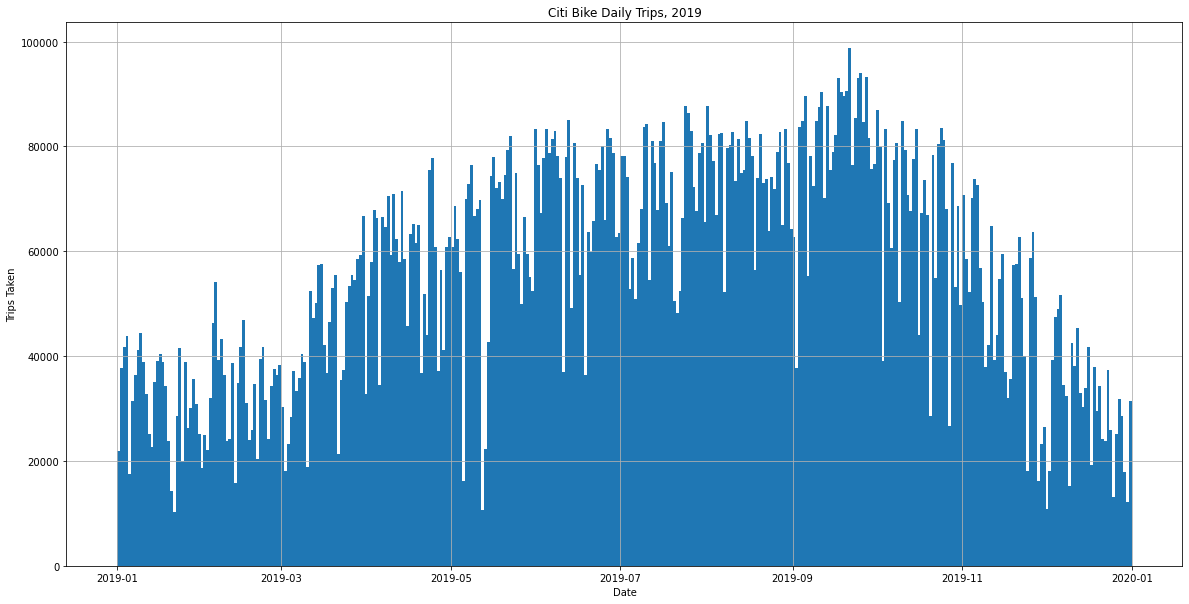

In [33]:
hist = cb.hist("starttime", figsize = (20,10), bins = 365)

for ax in hist.flatten():
    ax.set_xlabel("Date")
    ax.set_title("Citi Bike Daily Trips, 2019")
    ax.set_ylabel("Trips Taken")
